In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import keras
import matplotlib.pyplot as plt
import os

C:\Users\home\Anaconda3\envs\py36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
np.random.seed(2)

In [3]:
os.chdir("F://buffalo//buffalo project//credit card fraud//Dataset")

In [4]:
dataset=pd.read_csv("creditcard.csv")

#  EDA

In [5]:
dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


 # Scaling

In [6]:
from sklearn.preprocessing import StandardScaler
dataset["amt_scaled"]=StandardScaler().fit_transform(dataset['Amount'].values.reshape(-1,1))
dataset=dataset.drop(['Amount'],axis=1)
dataset=dataset.drop(['Time'],axis=1)

In [7]:
X=dataset.iloc[:,dataset.columns!="Class"]
y=dataset.iloc[:,dataset.columns =="Class"]

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=0)

In [9]:
X_train= np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)
print(X_train.shape,X_test.shape)

(199364, 29) (85443, 29)


# Random forest

In [10]:
from sklearn.ensemble import RandomForestClassifier


In [12]:
y_train=pd.DataFrame(y_train)
rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train.values.ravel())
y_pred=rf.predict(X_test)


In [13]:
rf.score(X_test,y_test)

0.9995435553526912

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn import svm, datasets
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[85290     6]
 [   33   114]]


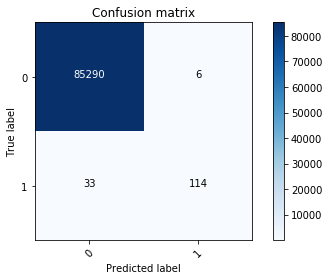

In [16]:
cnf_mat=confusion_matrix(y_test,y_pred.round())
plot_confusion_matrix(cnf_mat,classes=[0,1])
plt.show()

# Decision Tree 

In [17]:
from sklearn.tree import DecisionTreeClassifier
decision_tree=DecisionTreeClassifier()

In [18]:
tree=decision_tree.fit(X_train,y_train.values.ravel())


In [20]:
y_pred=tree.predict(X_test)
tree.score(X_test,y_test)

0.9992392589211521

Confusion matrix, without normalization
[[85267    29]
 [   36   111]]


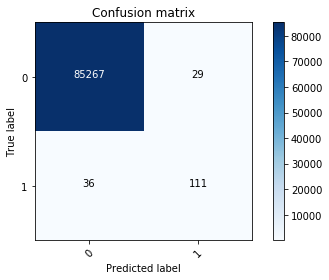

In [21]:
cm=confusion_matrix(y_test,y_pred.round())
plot_confusion_matrix(cm,classes=[0,1])
plt.show()

# Deep Neural Network

In [40]:
# Deep Neural Network
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [32]:

model=Sequential([Dense(units=16,input_dim=29,activation ='relu'),
                  Dense(units=24,activation ='relu'),
                  Dropout(.5),
                  Dense(units=20,activation ='relu'),
                  Dense(units=24,activation ='relu'),
                  Dense(units=1,activation ='sigmoid')])

In [33]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 16)                480       
_________________________________________________________________
dense_12 (Dense)             (None, 24)                408       
_________________________________________________________________
dropout_3 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 20)                500       
_________________________________________________________________
dense_14 (Dense)             (None, 24)                504       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
_________________________________________________________________


 # training 

In [34]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15,epochs=5)

Epoch 1/5
199364/199364 [==============================] - 24s 121us/step - loss: 0.0085 - acc: 0.9985
Epoch 2/5
199364/199364 [==============================] - 21s 104us/step - loss: 0.0039 - acc: 0.9994
Epoch 3/5
199364/199364 [==============================] - 19s 98us/step - loss: 0.0036 - acc: 0.9993
Epoch 4/5
199364/199364 [==============================] - 19s 98us/step - loss: 0.0034 - acc: 0.9994
Epoch 5/5
199364/199364 [==============================] - 19s 98us/step - loss: 0.0034 - acc: 0.9993


In [35]:
score=model.evaluate(X_test,y_test)

85443/85443 [==============================] - 2s 23us/step


In [36]:
print(score)

[0.0036176065173005112, 0.9994265182636377]


In [44]:
from sklearn.metrics import confusion_matrix
from sklearn import svm, datasets
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [45]:
y_pred=model.predict(X_test)
y_test =pd.DataFrame(y_test)

In [46]:

cnf_mat=confusion_matrix(y_test,y_pred.round())
print(cnf_mat)
plot_confusion_matrix(cnf_mat,classes=[0,1])
plt.show()

[[85278    18]
 [   31   116]]


Confusion matrix, without normalization
[[85278    18]
 [   31   116]]


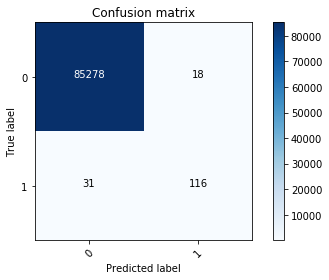

In [49]:
plot_confusion_matrix(cnf_mat,classes=[0,1])
plt.show()

In [25]:
! pip install imbalanced-learn

  Using cached https://files.pythonhosted.org/packages/e5/4c/7557e1c2e791bd43878f8c82065bddc5798252084f26ef44527c02262af1/imbalanced_learn-0.4.3-py3-none-any.whl


# Using SMOTE applying Neural Network Model

In [27]:
from imblearn.over_sampling import SMOTE

In [28]:
X_sample,y_sample= SMOTE().fit_sample(X,y.values.ravel())

In [30]:
y_resample=pd.DataFrame(y_sample)
X_resample=pd.DataFrame(X_sample)

In [36]:
X_train,X_test,y_train,y_test=train_test_split(X_resample,y_resample,test_size=.3)

In [37]:
X_train= np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [42]:
model=Sequential([Dense(units=16,input_dim=29,activation ='relu'),
                  Dense(units=24,activation ='relu'),
                  Dropout(.5),
                  Dense(units=20,activation ='relu'),
                  Dense(units=24,activation ='relu'),
                  Dense(units=1,activation ='sigmoid')])

In [43]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15,epochs=5)

Epoch 1/5
398041/398041 [==============================] - 45s 114us/step - loss: 0.0483 - acc: 0.9828
Epoch 2/5
398041/398041 [==============================] - 43s 109us/step - loss: 0.0181 - acc: 0.9950
Epoch 3/5
398041/398041 [==============================] - 43s 108us/step - loss: 0.0137 - acc: 0.9965
Epoch 4/5
398041/398041 [==============================] - 42s 104us/step - loss: 0.0120 - acc: 0.9970
Epoch 5/5
398041/398041 [==============================] - 41s 103us/step - loss: 0.0107 - acc: 0.9974


[[84644   389]
 [    0 85556]]
Confusion matrix, without normalization
[[84644   389]
 [    0 85556]]


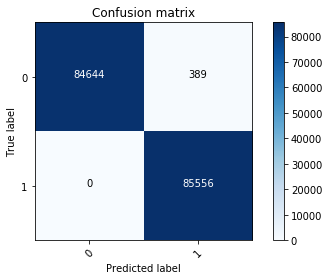

In [44]:
y_pred=model.predict(X_test)
y_test =pd.DataFrame(y_test)
cnf_mat=confusion_matrix(y_test,y_pred.round())
print(cnf_mat)
plot_confusion_matrix(cnf_mat,classes=[0,1])
plt.show()